In [57]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from tensorflow.keras import models, layers

import warnings
warnings.filterwarnings("ignore")

In [44]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [45]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [46]:
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)
print("Unique classes:", np.unique(y_train))

Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)
Unique classes: [0 1 2 3 4 5 6 7 8 9]


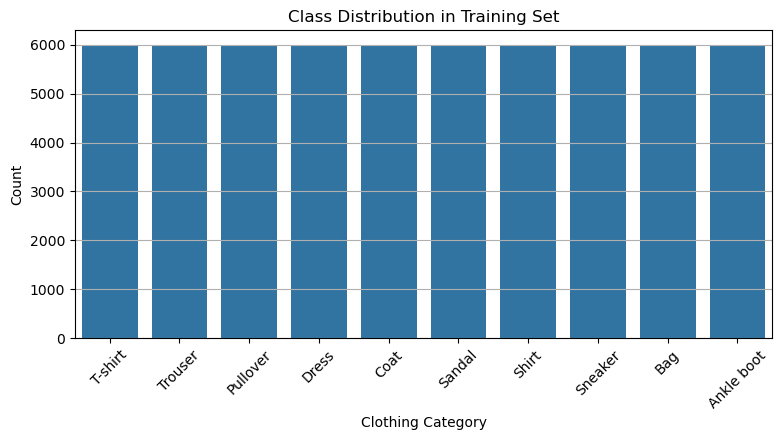

In [47]:
plt.figure(figsize=(9, 4))
sns.countplot(x=y_train)
plt.title("Class Distribution in Training Set")
plt.xticks(ticks=np.arange(10), labels=class_names, rotation=45)
plt.xlabel("Clothing Category")
plt.ylabel("Count")
plt.grid(axis='y')
plt.show()

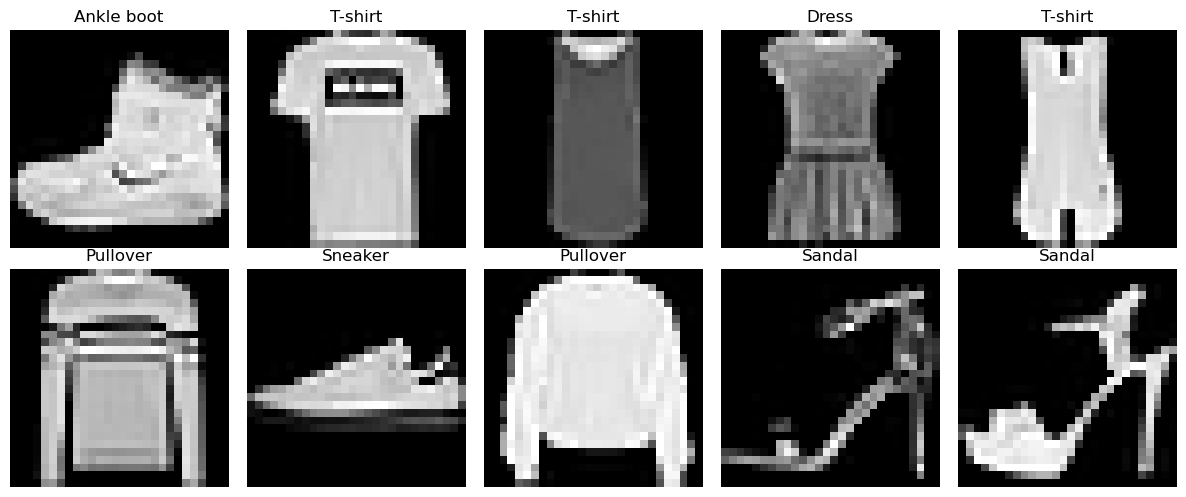

In [48]:
plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()


In [49]:
print(f"Pixel range: Min={X_train.min()}, Max={X_train.max()}")

Pixel range: Min=0, Max=255


In [50]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [51]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [52]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [53]:
history = model.fit(X_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7359 - loss: 0.7373 - val_accuracy: 0.8525 - val_loss: 0.4033
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8407 - loss: 0.4435 - val_accuracy: 0.8552 - val_loss: 0.3848
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8541 - loss: 0.3970 - val_accuracy: 0.8633 - val_loss: 0.3633
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8619 - loss: 0.3763 - val_accuracy: 0.8692 - val_loss: 0.3527
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8678 - loss: 0.3566 - val_accuracy: 0.8747 - val_loss: 0.3369


In [54]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\n Test Accuracy: {test_acc:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step - accuracy: 0.8711 - loss: 0.3569

 Test Accuracy: 0.87


In [55]:
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step


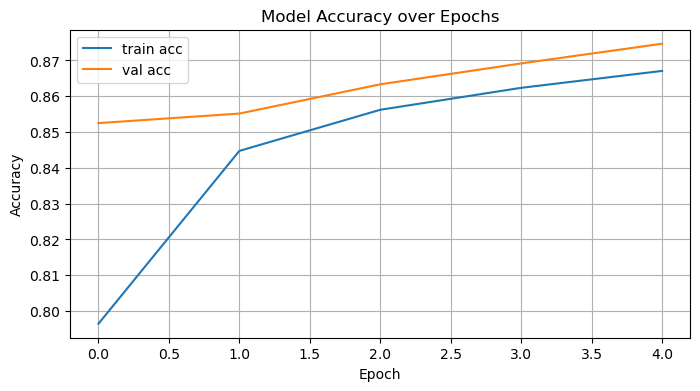

In [56]:
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title("Model Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()
